# 情報システム工学演習I

## 例題 ex02
- 例題1. SVDを使って簡単な行列を分解してみる
- 例題2. 時系列データ（人工データ）を用いたSVDに基づく特徴抽出
- 例題3. 時系列データ（google trends）を用いたSVDに基づく特徴抽出


### 例題1. SVDを使って簡単な行列を分解してみる


In [5]:
# 準備：各種インポート
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# 表示する桁数を設定
np.set_printoptions(precision=2)
np.set_printoptions(suppress = True)

# 行列Aの作成
A=np.array([
    [1,1,1,0,0],
    [2,2,2,0,0],
    [1,1,1,0,0],
    [5,5,5,0,0],
    [0,0,0,2,2],
    [0,0,0,3,3],
    [0,0,0,1,1]
    ]) 

# 特異値分解
(U, s, Vh) = linalg.svd(A) # decompose
k = 2 # k: 上位 k = 2 個の成分のみ使用
U = U[:,0:k]; s = s[0:k]; Vh = Vh[0:k,:]
print(f'====== A matrix - size:{A.shape} =====')
print(A)
print(f'====== U matrix - size:{U.shape} ======')
print(U)
print(f'====== s matrix - size:{np.diag(s).shape} ======')
print(np.diag(s))
print(f'====== Vh matrix - size:{Vh.shape} ======')
print(Vh)
print(f'====== recontruct A (= U x s x Vh) k = {k} ======')
print(np.dot(np.dot(U, np.diag(s)),Vh)) # reconstruct

# 行列の近似
k = 1 # k: 上位 k = 1 個の成分のみ使用
U = U[:,0:k]; s = s[0:k]; Vh = Vh[0:k,:]
print(f'====== recontruct A (= U x s x Vh) k = {k} ======')
print(np.dot(np.dot(U, np.diag(s)),Vh)) # reconstruct

====== A matrix - size:(7, 5) =====
[[1 1 1 0 0]
 [2 2 2 0 0]
 [1 1 1 0 0]
 [5 5 5 0 0]
 [0 0 0 2 2]
 [0 0 0 3 3]
 [0 0 0 1 1]]
====== U matrix - size:(7, 2) ======
[[-0.18  0.  ]
 [-0.36  0.  ]
 [-0.18  0.  ]
 [-0.9   0.  ]
 [ 0.   -0.53]
 [ 0.   -0.8 ]
 [ 0.   -0.27]]
====== s matrix - size:(2, 2) ======
[[9.64 0.  ]
 [0.   5.29]]
====== Vh matrix - size:(2, 5) ======
[[-0.58 -0.58 -0.58 -0.   -0.  ]
 [-0.   -0.   -0.   -0.71 -0.71]]
====== recontruct A (= U x s x Vh) k = 2 ======
[[1. 1. 1. 0. 0.]
 [2. 2. 2. 0. 0.]
 [1. 1. 1. 0. 0.]
 [5. 5. 5. 0. 0.]
 [0. 0. 0. 2. 2.]
 [0. 0. 0. 3. 3.]
 [0. 0. 0. 1. 1.]]
====== recontruct A (= U x s x Vh) k = 1 ======
[[1. 1. 1. 0. 0.]
 [2. 2. 2. 0. 0.]
 [1. 1. 1. 0. 0.]
 [5. 5. 5. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


### 例題2.人工データ(1次元)を用いたSVDに基づく特徴抽出

#### (2-1) データの作成

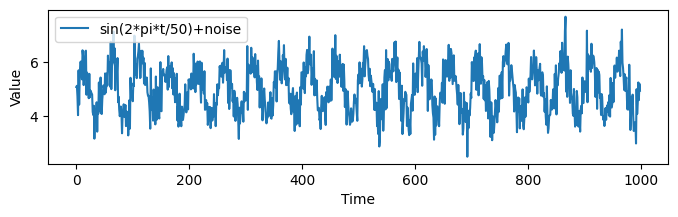

In [7]:
# 時系列データ（人工データ）の作成  x(t) = sin(2pi*t/50)+e, where, e=Gauss(5,0.5)
from random import gauss
noise  = [gauss(5.0, 0.5) for i in range(1000)]
time   = np.arange(0, 1000, 1);
X = np.sin(2 * np.pi * time / 50) + noise
# 生成した時系列データの可視化
plt.figure(figsize=(8,2))
plt.plot(X, label='sin(2*pi*t/50)+noise')
plt.xlabel('Time'); plt.ylabel('Value')
plt.legend()

#### (2-2) SVDを用いた行列分解

In [13]:
# 部分シーケンス行列 Xw (delay coordinates matrix) を作成する関数
# plase also see def 1 & procedure 1
def delay_coordinates(X, w):
  m  = len(X) # m: sequence length len_X = len(X)
  mp = int(np.floor(m / w)) 
  Xw = np.zeros((mp, w))  # matrix Xw --- size:[mp x w] 
  for t in range(1, mp+1):  # t = (1, ..., mp)
    Xw[t-1,:] = X[(t-1)*w:t*w]  
  return Xw

def my_svd(Xw, k):
  # 特異値分解 - decompose Xw -> (U, s, Vh) 
  [U, s, Vh] = linalg.svd(Xw, full_matrices=False)
  # top-k成分を使った近似 - low-rank approximation
  U_k = U[:,0:k]; s_k = s[0:k]; Vh_k = Vh[0:k,:]
  return (U_k, s_k, Vh_k)


In [14]:
# 時系列データ (1次元)とウィンドウサイズwに対し、k個の重要な特徴的パターンを抽出し、可視化する関数
def svd_decomp(X, w, k, minus=False):
  # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh) = my_svd(Xw, k)
  print(f'top-k decomposed matrices [U * s * Vh] --- size: U:{U.shape}, s:{s.shape}, Vh:{Vh.shape}')
  # (c) 特徴抽出結果の可視化
  if(minus): U*=-1; Vh*=-1 # 必要なら成分の符号を反転させる (可視化のため)
  # ---------------------------- #
  plt.figure(figsize=(6,6))
  colors = ['orange', 'green', 'purple', 'skyblue', 'pink']
  # ---------------------------- #
  plt.subplot(k+1,1,1)
  # (c-i) オリジナルデータとシーケンス分割の可視化
  plt.plot(X) 
  for t in range(0,len(Xw)+1):
    plt.axvline(x = t*w, color = 'gray', linestyle='dashed')
  plt.xlabel(f'Time (window size w={w})')
  plt.title(f'Original Sequence X (len={len(X)})')
  # ---------------------------- #
  # (c-ii) 特徴抽出結果 (projection matrix P = U x s)
  for i in range(0,k):
    plt.subplot(k+1,1,i+2)
    plt.stem(U[:,i]*s[i], 'x--', linefmt=colors[i])
    plt.xlabel(f't-th subsequence Xw(t) (t=1,...,{len(Xw)})')
    plt.title(f'Projection matrix P[{i}] = U[{i}]*s[{i}]')
  plt.tight_layout()
  # ---------------------------- #
  # (c-iii) 特徴抽出結果 (Local patterns Vh)
  plt.figure(figsize=(6,2))
  for i in range(0,k):
    plt.subplot(1,k,i+1)
    plt.plot(Vh[i,:], '+-', color=colors[i])
    plt.xlabel(f'Time (window size w={w})')
    plt.title(f'Local patterns Vh[{i}]')
  plt.tight_layout()


create delay coordinates matrix (w=50),   X: (1000,) ->  Xw: (20, 50)
top-k decomposed matrices [U * s * Vh] --- size: U:(20, 2), s:(2,), Vh:(2, 50)


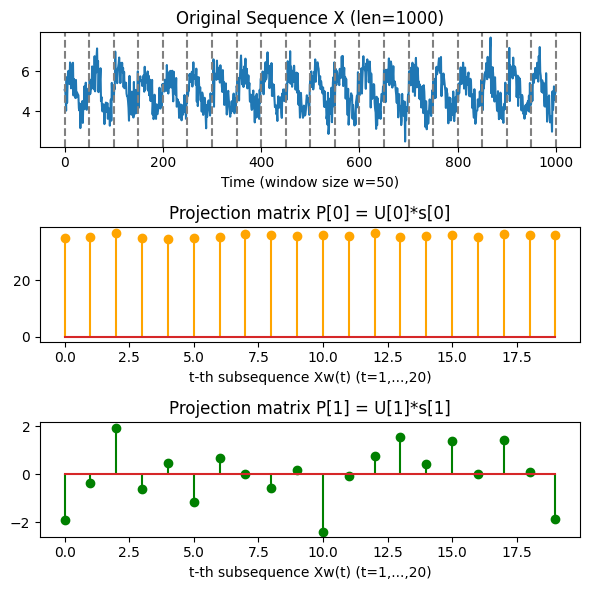

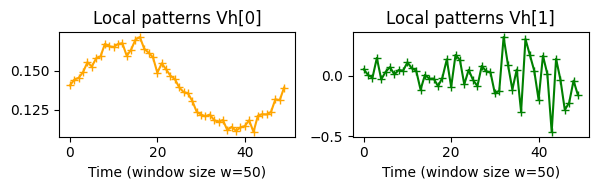

In [15]:
# SVDを用いた特徴抽出
w = 50 # ウィンドウ幅 50 - window size w 
k = 2 # k: 上位 k = 2 個の成分のみ使用
svd_decomp(X, w, k, minus=True)

#### (2-3) SVDを用いた近似

In [16]:
# top-k成分のみを使ったオリジナルデータの近似 - reconstract Xw using top-k components
def reconstruct(X, w, k):
 # (a) 部分シーケンス行列 Xw (delay coordinates matrix) の作成
  Xw = delay_coordinates(X, w) # 部分シーケンス行列を作成
  print(f'create delay coordinates matrix (w={w}),   X: {X.shape} ->  Xw: {Xw.shape}')
  # (b) SVDを用いた行列分解
  (U, s, Vh) = my_svd(Xw, k)

  # (c) 分解した行列を用いたオリジナルデータの復元と可視化
  plt.figure(figsize=(6,6))
  plt.subplot(k+1, 1, 1)
  plt.plot(X); plt.title(f'Original sequence X') 
  for i in range(1,k+1):
    plt.subplot(k+1,1,1+i)
    # i個の成分のみ選択して近似
    U_k = U[:,0:i]; s_k = s[0:i]; Vh_k = Vh[0:i,:]
    Xw_rec  = np.dot(np.dot(U_k, np.diag(s_k)),Vh_k) # delay coordinates matrix
    X_rec   = Xw_rec.flatten() # reconstracted sequence
    plt.plot(X_rec, color='gray')
    plt.title(f'Reconstruction X_rec  (k={i})') 
  plt.tight_layout()



create delay coordinates matrix (w=50),   X: (1000,) ->  Xw: (20, 50)


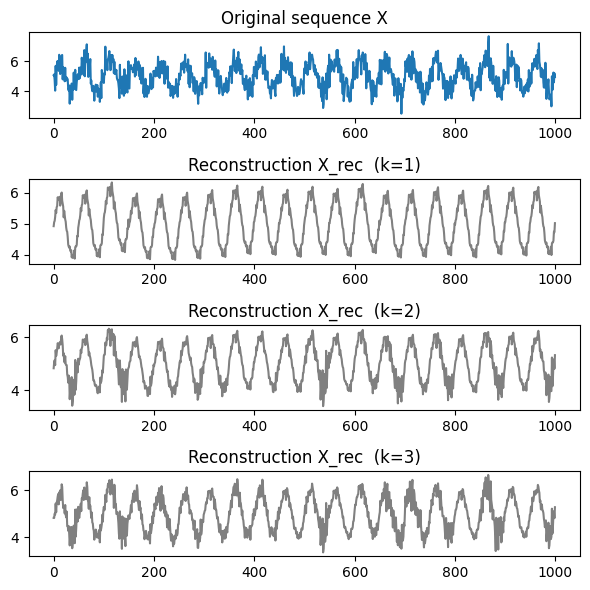

In [17]:

# SVDの行列分解を用いたオリジナルデータの近似を可視化
reconstruct(X,w=50,k=3)

### 例題3. 実データ ( google trends) を用いた用いたSVDに基づく特徴抽出

 

#### (3-1) データのダウンロード

In [18]:
import numpy as np
import pandas as pd # import pandas

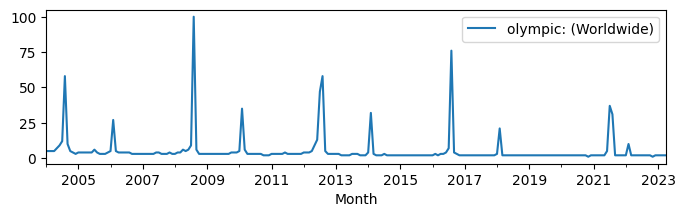

In [19]:
# キーワード：「olympic」を解析
fn='./data_olympic.csv' # ファイル名を指定
fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_olympic.csv'
index_col = 'Month' # インデックスを指定
df = pd.read_csv(fn, header=1, index_col=index_col, parse_dates=True)
df.plot(figsize=(8,2)) #可視化 (figure)
X = df['olympic: (Worldwide)'].to_numpy()

#### (3-2) SVDを用いた行列分解

create delay coordinates matrix (w=12),   X: (232,) ->  Xw: (19, 12)
top-k decomposed matrices [U * s * Vh] --- size: U:(19, 3), s:(3,), Vh:(3, 12)


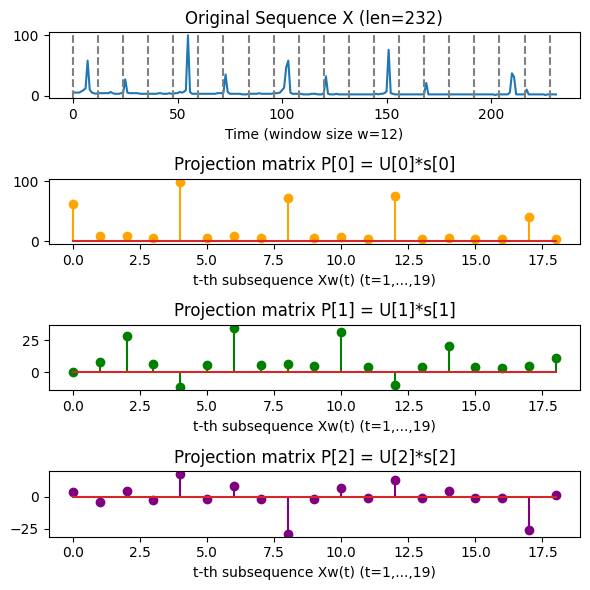

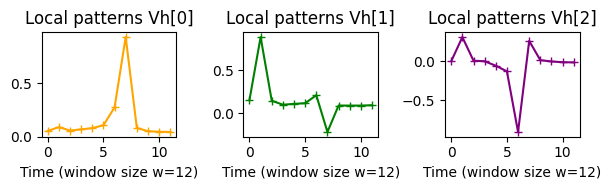

In [20]:
w = 12 # ウィンドウ幅 12 months - window size w 
k = 3  # k: 上位 k = 3 個の成分のみ使用
svd_decomp(X, w, k, minus=True)

#### (3-3) SVDを用いた近似

create delay coordinates matrix (w=12),   X: (232,) ->  Xw: (19, 12)


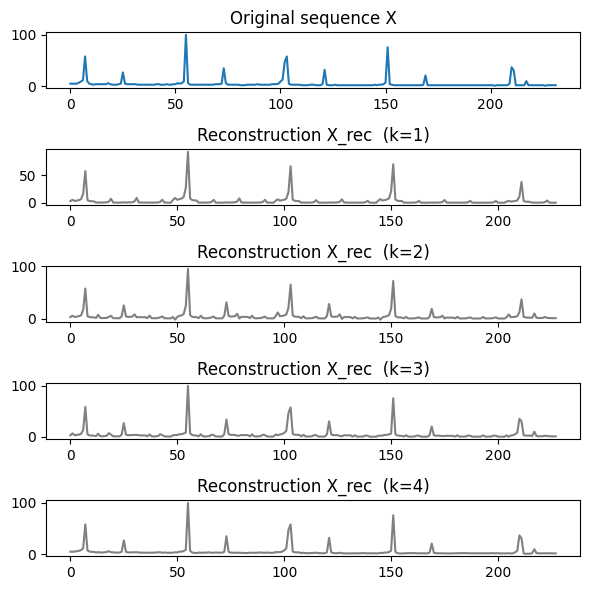

In [23]:
# SVDの行列分解を用いたオリジナルデータの近似を可視化
reconstruct(X, w=12,k=4)